 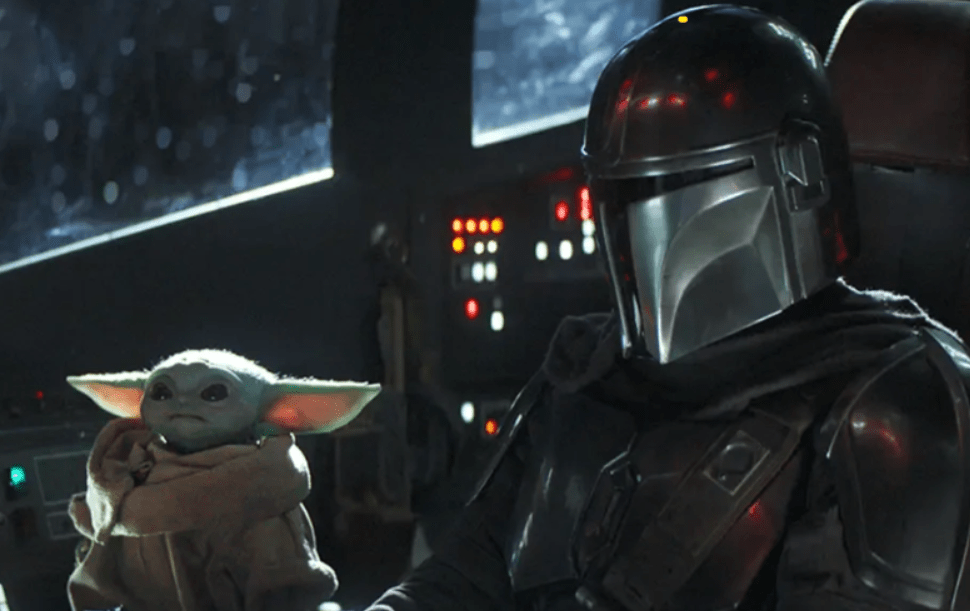

# Content Based Recommendation

Content-based recommendation, also known as content-based filtering, is a recommendation system that provides users with personalized recommendations based on their interests. This recommendation system suggests similar content based on the content the user has consumed in the past.

This type of recommendation system distinguishes content from one another using predefined features and brings together content with similar features. For example, the features for a movie may include genre, actors, director, plot, etc.

Based on a user's past consumption habits, the system suggests other content with similar features. For example, if a user has previously watched romantic comedies, the system will suggest romantic comedies with similar features.

The content-based recommendation system is particularly successful in areas where the content remains relatively fixed, such as music, movies, books, and news recommendations.

## Steps

### 1. EDA(Exploratory Data Analysis)

EDA stands for Exploratory Data Analysis, which is an approach to analyzing and summarizing a dataset in order to gain insights and identify patterns and relationships between variables.

EDA involves visualizing and manipulating data using various statistical and computational methods, in order to identify patterns, anomalies, and trends. Some common techniques used in EDA include scatter plots, histograms, box plots, and correlation analysis.

The goal of EDA is to understand the data and the relationships between variables, so that we can identify potential problems, such as missing data, outliers, or errors in the dataset, and address them appropriately. EDA is often the first step in the data analysis process and is essential for making informed decisions about how to proceed with data modeling and analysis.

### 2. Creating the TF-IDF Matrix

**TF**

TF stands for Term Frequency and it measures the frequency of a term (i.e., a word or a phrase) in a document. The term frequency of a term t in a document d is calculated as the number of times t appears in d, divided by the total number of terms in d. This calculation normalizes the term frequency by the document length to avoid bias towards longer documents.

TF is commonly used in natural language processing and information retrieval to represent the importance of a term within a document. It can be used in combination with IDF (Inverse Document Frequency) to calculate the TF-IDF score, which provides a measure of the importance of a term across a collection of documents.

**IDF**

IDF stands for Inverse Document Frequency and it is used to determine how important a word is in a document collection. IDF measures the rarity of a term across the entire document collection. Words that occur frequently across the collection, such as "the" or "and," will have a low IDF value, while words that are rare, such as domain-specific jargon, will have a higher IDF value.

The IDF score of a term is calculated as the logarithm of the total number of documents in the collection divided by the number of documents that contain the term. The formula for IDF is:

IDF = log(N / df)

where N is the total number of documents in the collection, and df is the number of documents that contain the term.

The IDF value is used in the TF-IDF (Term Frequency-Inverse Document Frequency) formula to calculate the importance of a term in a document. The higher the IDF score, the more important the term is in distinguishing between documents.

**Text Vectorization** 

Text vectorization is the process of transforming text into numerical vectors that can be processed by machine learning algorithms. In natural language processing (NLP), text vectorization is a crucial step in building machine learning models that can analyze and understand human language.

There are several ways to vectorize text, but one common approach is the Bag-of-Words (BoW) model. In the BoW model, the text is first preprocessed by removing stop words and punctuation, and then the remaining words are tokenized into a list of terms. The model then creates a dictionary of all the unique terms in the corpus and assigns each term an index. Finally, each document is represented as a vector of term frequencies, where each entry in the vector corresponds to the count of the corresponding term in the document.

Another popular approach to text vectorization is the Term Frequency-Inverse Document Frequency (TF-IDF) model, which takes into account the relative frequency of a term in a document and across the entire corpus. This model assigns a weight to each term in the document, based on how frequently it occurs in the document and how rare it is in the entire corpus.

Text vectorization is an important technique in NLP because it allows machine learning models to analyze and process large volumes of textual data, which can then be used to build applications such as sentiment analysis, chatbots, and information retrieval systems.

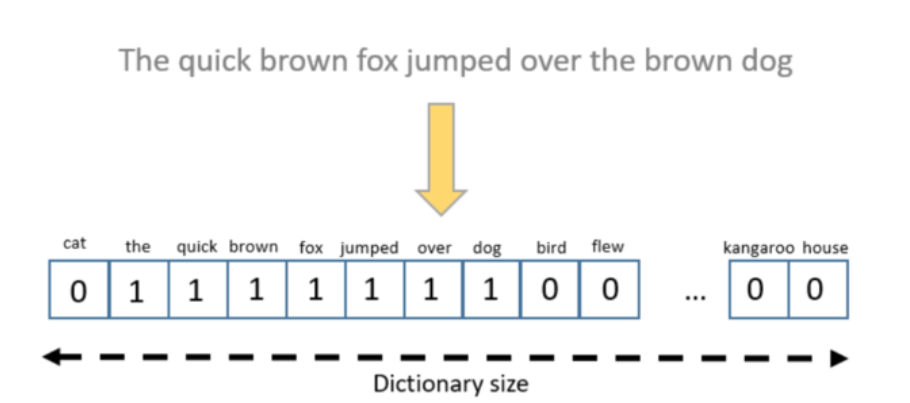

### 3. Creating the Cosine Similarity Matrix

**Cosine similarity**

Cosine similarity is a measure of similarity between two non-zero vectors in a high-dimensional space. It is commonly used in natural language processing and information retrieval to compare the similarity of two documents or pieces of text.

To calculate the cosine similarity between two vectors, we first compute the dot product of the two vectors, which is the sum of the products of their corresponding elements. Then, we divide the dot product by the product of their magnitudes to obtain the cosine of the angle between the two vectors. The resulting value is a measure of the similarity between the two vectors, with a value of 1 indicating that the vectors are identical, and a value of 0 indicating that the vectors are completely dissimilar.

In the context of text similarity, cosine similarity is often used to compare the similarity of two documents or pieces of text that have been vectorized using techniques such as the Bag-of-Words (BoW) model or the Term Frequency-Inverse Document Frequency (TF-IDF) model. By comparing the cosine similarity of multiple documents, we can identify those that are most similar to each other and group them accordingly, which is useful for tasks such as document clustering or information retrieval.

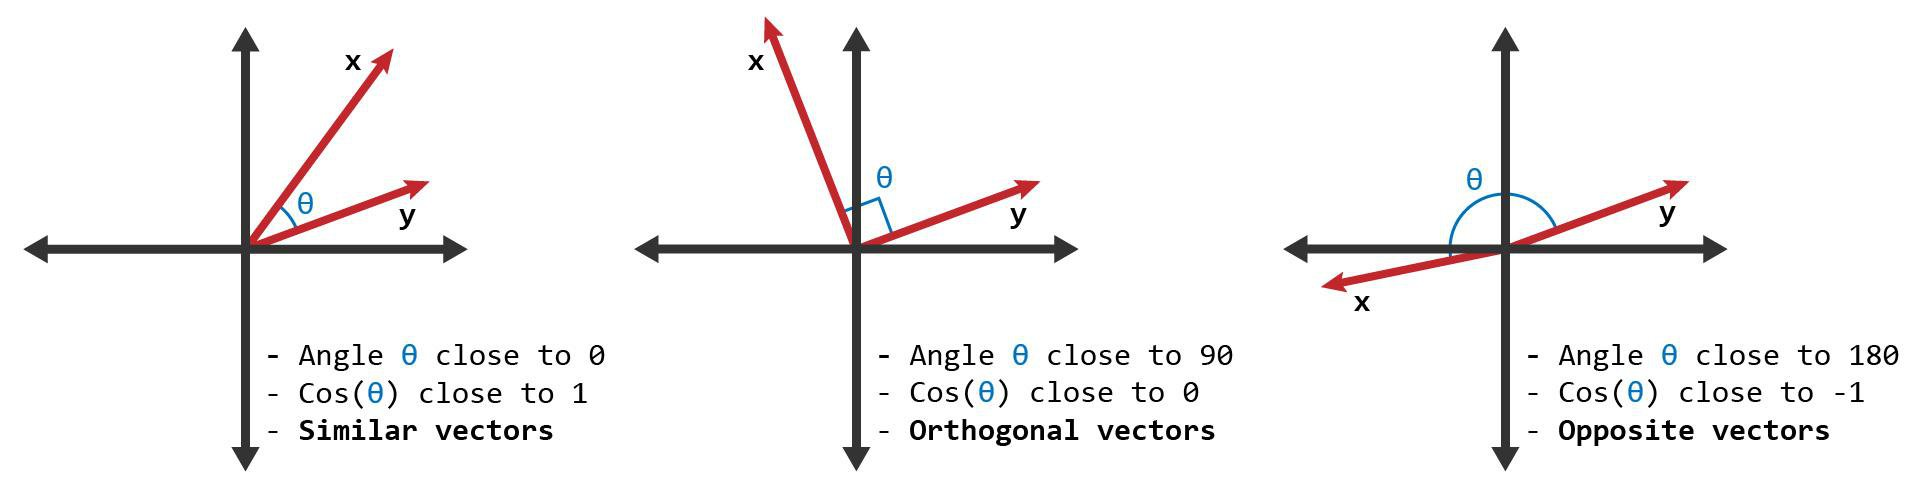
 
 
**Additional info**

**Euclidean distance**

Euclidean distance is a measure of distance between two points in a multidimensional space. It is named after the ancient Greek mathematician Euclid, who first described it in his work "Elements".

In two-dimensional space, the Euclidean distance between two points (x1, y1) and (x2, y2) is calculated using the Pythagorean theorem:

distance = sqrt((x2 - x1)^2 + (y2 - y1)^2)

In higher-dimensional spaces, the Euclidean distance between two points (x1, y1, z1, ..., xn) and (x2, y2, z2, ..., xn) is calculated using a similar formula:

distance = sqrt((x2 - x1)^2 + (y2 - y1)^2 + (z2 - z1)^2 + ... + (xn - x1)^2)

Euclidean distance is commonly used in machine learning and data analysis to measure the similarity or dissimilarity between two data points. For example, it can be used in clustering algorithms to group similar data points together, or in anomaly detection to identify data points that are far from the cluster centroid.

**The difference between the two**

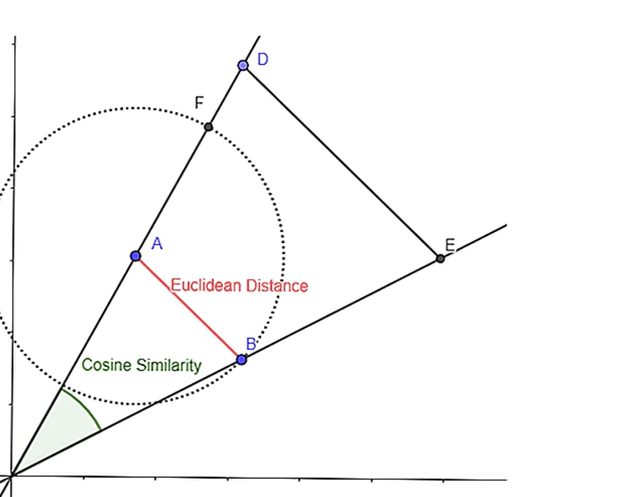


### 4. Making Suggestions Based on Similarities

Making suggestions according to the similarities of the movie descriptions

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv', low_memory=False)

# EDA(Exploratory Data Analysis)

In [3]:
def eda(dataframe):
    print(f"""
    
    -- Info --
    
    {dataframe.dtypes}
    
    -- NaN Values --
    
    {dataframe.isnull().sum()}
    
    -- Shape --
    
    {dataframe.shape}
    
    -- Unique --
    
    {df.apply(lambda x: x.nunique())}
    
    -- Head --
    """)
    
    
    return dataframe.head()
eda(df)


    
    -- Info --
    
    adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object
    
    -- NaN Values --
    
    adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homep

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


We will use overview

In [4]:
df['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object


We drop empty and duplicate data

In [5]:
df = df[~df["title"].duplicated(keep='last')]
df = df[~df["title"].isna()]
df = df[~df["overview"].isna()]

We should remove the stop words in the text

**Stop Words**

Stop words are common words that are often removed from text during natural language processing because they are not considered to be meaningful in determining the overall meaning of a sentence or document. Stop words include words such as "the", "a", "an", "and", "in", "of", "to", "that", "it", and "for".

# Creating the TF-IDF Matrix



In [6]:
tfidf = TfidfVectorizer(stop_words="english")

tfidf_matrix = tfidf.fit_transform(df['overview'])

print(tfidf_matrix.shape)

(41344, 73955)


Shape: (41344, 73955)

41344:  Overviews so Movies

73955: Words

Value: TF-IDF Scores


In [7]:
 ## tfidf.get_feature_names()[:7]# that's give us words

In [8]:
## tfidf_matrix.toarray() # TF-IDF Scores

In [9]:
tfidf_matrix = tfidf_matrix.astype(np.float32) # it's too big so it's very difficult to process so i halved the size

# Creating the Cosine Similarity Matrix

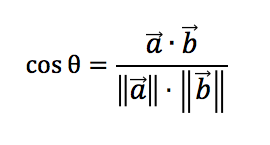

Cosine similarity is one of the metric to measure the text-similarity between two documents irrespective of their size in Natural language Processing. A word is represented into a vector form. The text documents are represented in n-dimensional vector space.


In [10]:
cosine_sim = cosine_similarity(tfidf_matrix,
                               tfidf_matrix)

print(cosine_sim.shape)
cosine_sim[1]

(41344, 41344)


array([0.01515217, 1.        , 0.04651843, ..., 0.        , 0.02192681,
       0.00924592], dtype=float32)

shape: (41344, 41344) 

41344: movies

# Making Suggestions Based on Similarities

In [11]:
indices = pd.Series(df.index, index=df['title'])
print('Toy Story ID:',indices["Toy Story"])

Toy Story ID: 0


In [12]:
movie_index = indices["Toy Story"]

cosine_sim[movie_index]

array([1.        , 0.01515217, 0.        , ..., 0.        , 0.0059364 ,
       0.        ], dtype=float32)

In [13]:
similarity_scores = pd.DataFrame(cosine_sim[movie_index], columns=["score"])
similarity_scores

,score
0,1.000000
1,0.015152
2,0.000000
3,0.000000
4,0.000000
...,...
41339,0.000000
41340,0.000000
41341,0.000000
41342,0.005936


All similarity scores of Toy Story movie and other movies.

In [14]:
print(similarity_scores.sort_values("score", ascending=False)[1:11].index)
movie_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index

Int64Index([13471, 2554, 8918, 21827, 21202, 26120, 39409, 34680, 38733, 7191], dtype='int64')


In [15]:
df['title'].iloc[movie_indices]

15348                                     Toy Story 3
2997                                      Toy Story 2
10301                          The 40 Year Old Virgin
24523                                       Small Fry
23843                     Andy Hardy's Blonde Trouble
29202                                      Hot Splash
43427                Andy Kaufman Plays Carnegie Hall
38476    Superstar: The Life and Times of Andy Warhol
42721    Andy Peters: Exclamation Mark Question Point
8327                                        The Champ
Name: title, dtype: object

That's it, if you like Toy Story movie, here are 10 similar movies for you :D

Don't forget to vote :)